In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleansed Set B Corporate Rating.csv')

In [3]:
#brief look into the data
df.head()

,Bond Rating,Cash,Earnings Before Interest,Gross Profit (Loss),Retained Earnings,EBTI Margin (Revenue),Dividends per Share - Pay Date - Calendar,Total Stockholders Equity,Total Market Value (Fiscal Years),Total Revenue,Financing Activities - Net Cash Flow,Net Cash Flow,Debt to Equity Ratio,Return on Asset,Interest Coverage,Current Ratio,Return on Equity,Quick Ratio,Risk Rating
0,B+,994.000,6585.000,13139.000,-13121.000,0.154396,0.2000,2021.000,37405.5843,42650.000,-315.000,2765.000,8.013855,0.150442,0.138952,0.078187,6.048491,0.038898,High Risk
1,A-,7.604,1228.600,1228.600,1857.924,0.351870,2.2975,4519.102,7553.1050,3491.632,-178.881,920.746,0.670756,0.085835,0.163560,0.038974,0.227401,0.001124,Low Risk
2,A+,4063.000,4475.000,12088.000,17821.000,0.221020,0.8800,21639.000,67891.7357,20247.000,-2742.000,933.000,0.157493,0.108419,0.033520,0.413236,0.551689,0.250370,Low Risk
3,BB+,466.829,134.767,308.828,1759.236,0.204120,0.6838,2045.311,2667.9542,660.235,-45.802,87.781,0.000000,0.060959,0.020762,3.724350,0.149625,2.821401,High Risk
4,A,1420.400,4848.700,15091.500,9940.400,0.083594,0.9000,14551.800,31072.7340,58003.200,-1235.000,2137.800,0.539590,0.090796,0.067915,0.045822,1.014459,0.045822,Low Risk


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [15]:
custom_mapping = {
    'In Default': 5,
    'Highest Risk': 4,
    'High Risk': 3,
    'Medium Risk': 2,
    'Low Risk': 1,
    'Lowest Risk': 0
}

X = df.drop(columns=['Risk Rating', 'Bond Rating'])
y = df['Risk Rating'].map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Model 2: Logistic Regression
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

# Model 3: Decision Tree
dectree_model = DecisionTreeClassifier(random_state=42)
dectree_model.fit(X_train, y_train)
dectree_pred = dectree_model.predict(X_test)

# Model 4: XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

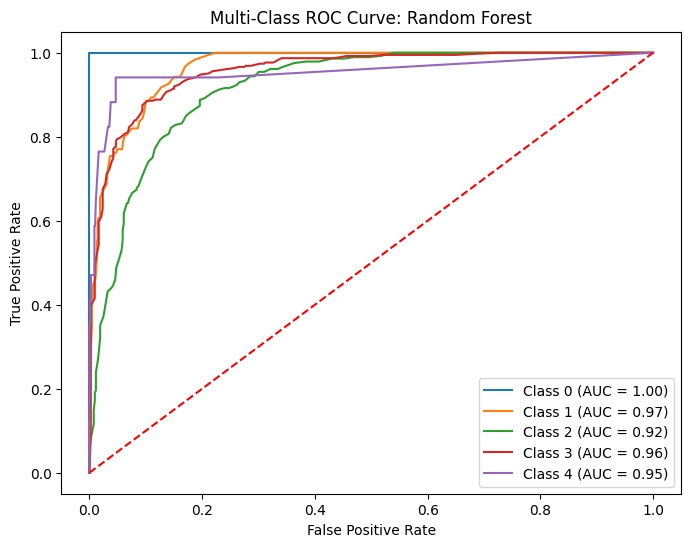

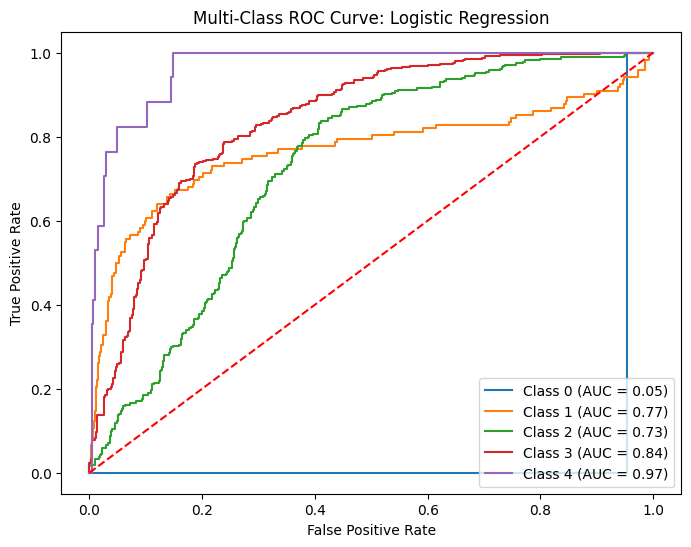

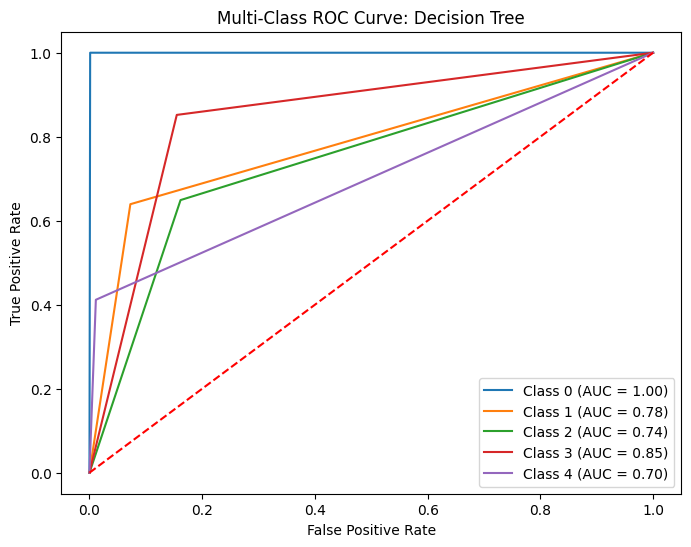

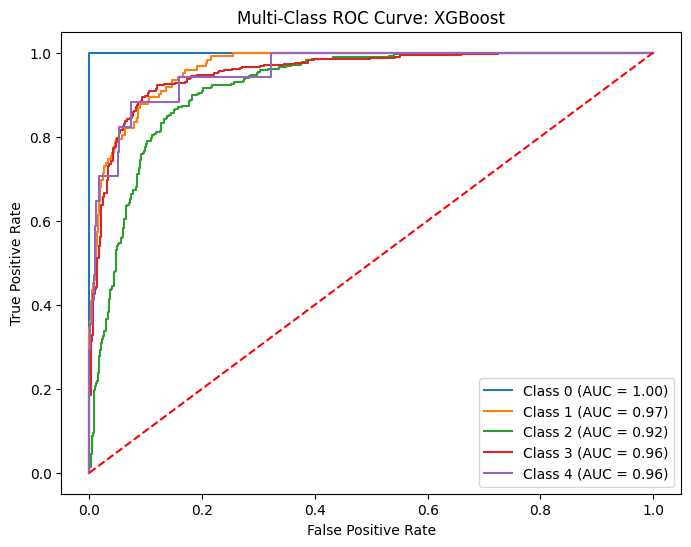

In [19]:
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = len(classes)

pred1 = rf.predict_proba(X_test)
pred2 = logreg_model.predict_proba(X_test)
pred3 = dectree_model.predict_proba(X_test)
pred4 = dectree_model.predict_proba(X_test)

models = [
    ("Random Forest", rf.predict_proba(X_test)),
    ("Logistic Regression", logreg_model.predict_proba(X_test)),
    ("Decision Tree", dectree_model.predict_proba(X_test)),
    ("XGBoost", xgb_model.predict_proba(X_test)),
]

for model_name, pred in models:
    plt.figure(figsize=(8, 6))
    plt.title(f'Multi-Class ROC Curve: {model_name}')
    
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'r--')  # Random chance line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

From the above auc-roc graphs, we can see that XGBoost model performed the best, followed by Random Forest model. We will be using XGBoost Model as our main model and try to fine-tune the model to make it better.